# Question 7

The amplitude damping channel is a CPTP map for a qubit that describes the loss of energy, e.g. through spontaneous emission. The map is specified by the Kraus operators

$$ \hat{K}_0 = \sqrt{1-r} \hat{\sigma}_+\hat{\sigma}_- + \hat{\sigma}_-\hat{\sigma}_+,\qquad \hat{K}_1 = \sqrt{r}\hat{\sigma}_-,$$

(a) Verify that the Kraus operators above constitute a CPTP map.

(b) Starting from the superposition state $\hat{\rho} = |+\rangle\langle +|$, with $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, find the density matrix $\mathcal{E}(\hat{\rho})$ (e.g. numerically) and plot the expectation values of the three Pauli operators $\hat{\sigma}_{x,y,z}$ as a function of $r$.

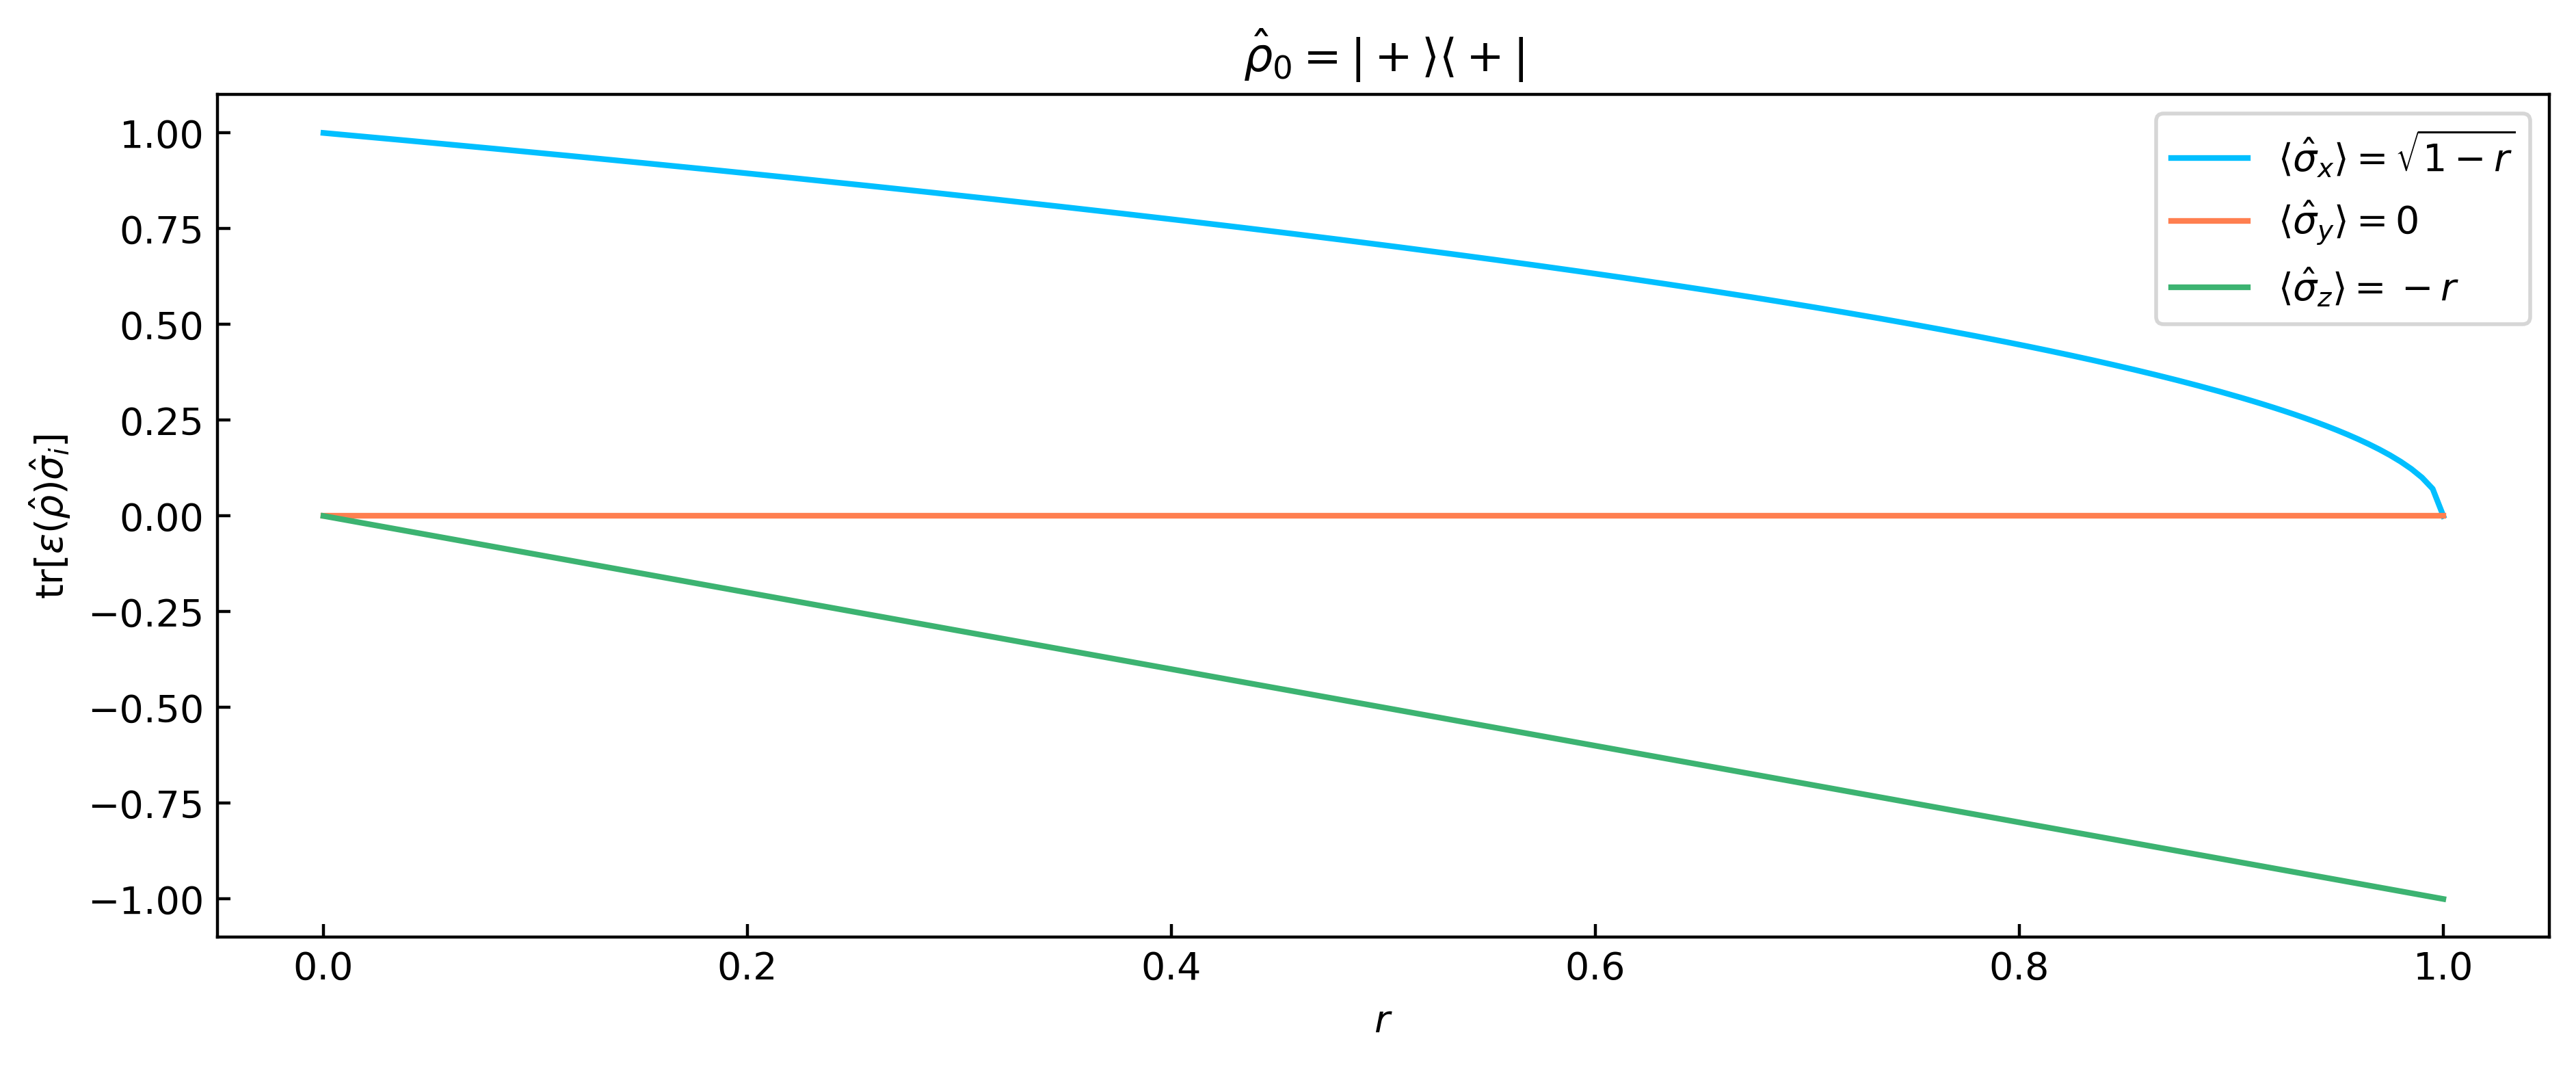

In [1]:
import numpy as np
import matplotlib.pyplot as plt

zero = np.array([[1],[0]])
one = np.array([[0],[1]])

plus = 1/np.sqrt(2) * (zero+one)
rho0 = plus @ plus.T

raising = zero @ one.T.conjugate()
lowering = raising.T.conjugate()

def kraus(r):
    K0 = np.sqrt(1-r)*(raising @ lowering) + lowering @ raising
    K1 = np.sqrt(r) * lowering
    return K0, K1
def mapping(rho, r):
    K0, K1 = kraus(r)
    return K0 @ rho @ K0.T.conjugate() + K1 @ rho @ K1.T.conjugate()

size = 200
r = np.linspace(0, 1, size)
maps = [mapping(rho0, i) for i in r]
#define the pauli matrices
sig_X = np.array([[0,1],[1,0]])
sig_Y = np.array([[0,-1j],[1j,0]])
sig_Z = np.array([[1,0],[0,-1]])
#expectation values for each of the pauli matrices
exp_X = [np.trace(sig_X @ i).real for i in maps]
exp_Y = [np.trace(sig_Y @ i).real for i in maps]
exp_Z = [np.trace(sig_Z @ i).real for i in maps]

plt.figure(figsize=(11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.plot(r, exp_X, label=r'$\langle\hat{\sigma}_x\rangle = \sqrt{1-r}$', c='deepskyblue')
plt.plot(r, exp_Y, label = r'$\langle\hat{\sigma}_y\rangle = 0$', c='coral')
plt.plot(r, exp_Z, label = r'$\langle\hat{\sigma}_z\rangle = -r$', c='mediumseagreen')
plt.xlabel(r'$r$')
plt.ylabel(r'tr$[\varepsilon(\hat{\rho}) \hat{\sigma}_i]$')
plt.title(r'$\hat{\rho}_0 = |+\rangle\langle+|$')
plt.legend()
plt.show()


(c) Now let us interpret the above Kraus operators as representing a generalised measurement with two outcomes. Write down analytical expressions for the probabilities of these two outcomes and the corresponding post-measurement states, assuming an arbitrary initial density matrix $\hat{\rho}$. Plot a histogram of the results that might be obtained from 200 such measurements on the state $\hat{\rho} = |+\rangle\langle +|$, assuming that $r=0.5$.

P(0)= 0.75 
 P(1)= 0.25


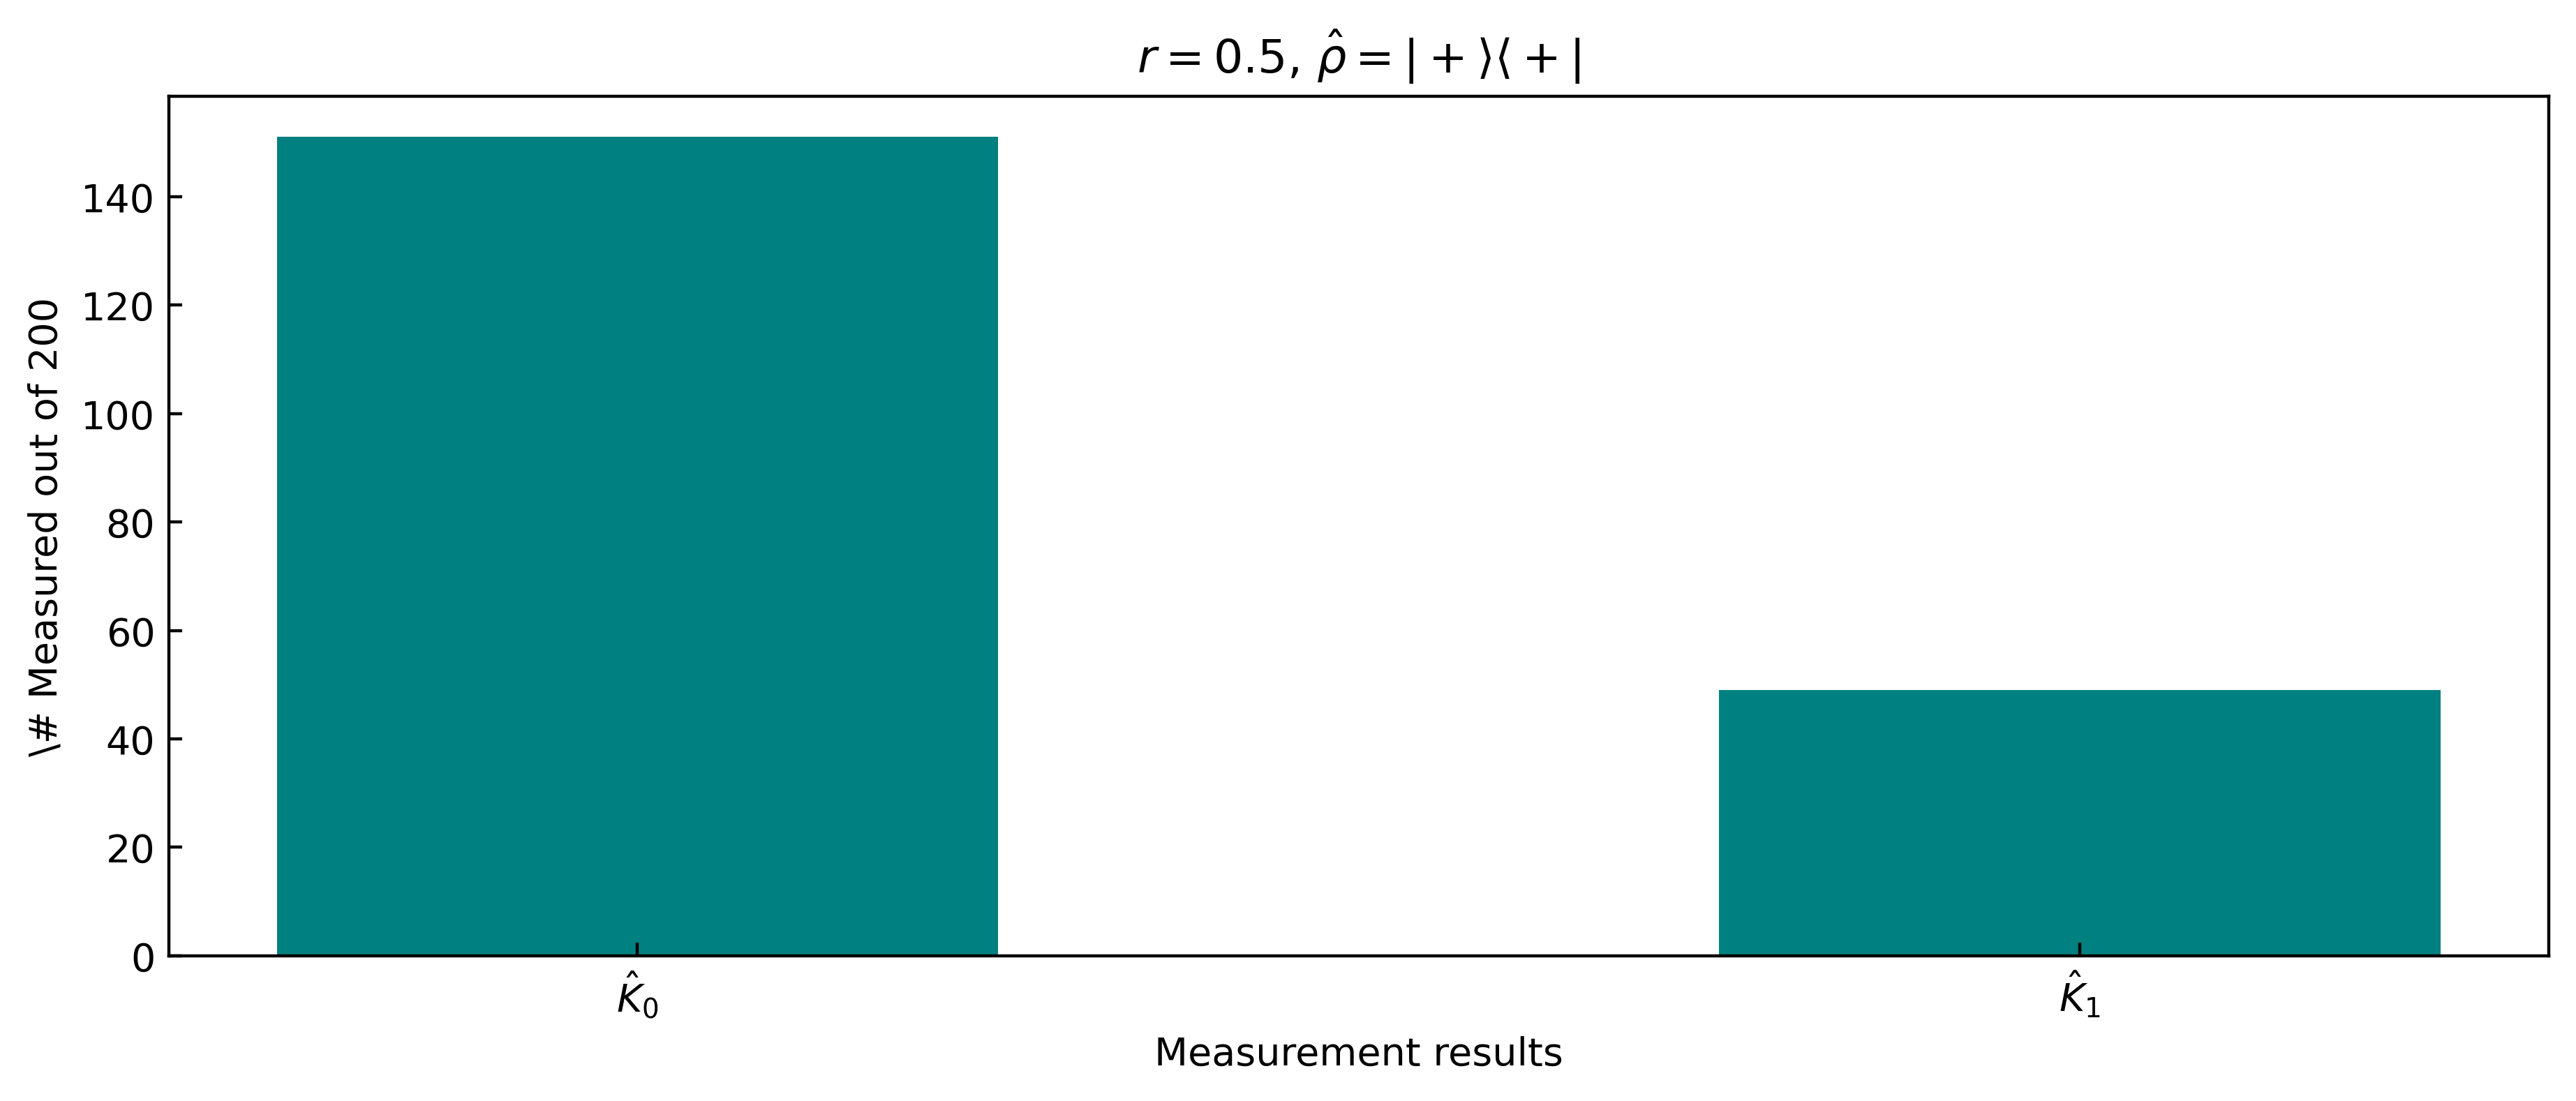

In [6]:
from random import random
def biased_coin(p):
    r = random()
    if r < p:
        return 0
    else: 
        return 1

rho = plus @ plus.T
r = 0.5
K0, K1 = kraus(r)
p0 = np.trace(K0 @ rho @ K0.T.conjugate()).real
p1 = np.trace(K1 @ rho @ K1.T.conjugate()).real
p_total = p0 + p1
print('P(0)=', round(p0, 3), '\n','P(1)=',round(p1,3))

#2 possible outcomes, 0 and 1, with probabilities p0 and p1
measurements_size = 200
outcomes = [biased_coin(p0) for i in range(measurements_size)]

plt.figure(figsize= (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.hist(outcomes, [-.25,.25,.75,1.25], color='teal')
plt.xticks([0,1],[r'$\hat{K}_0$',r'$\hat{K}_1$'])
plt.xlabel(r'Measurement results')
plt.ylabel(r'\# Measured out of ' + str(measurements_size))
plt.title(r'$r=0.5$, $\hat{\rho}=|+\rangle\langle+|$')
plt.show()

(d) Now consider the generalised measurement defined by the Kraus operators

$$ \hat{K}_0 = \sqrt{1-r}\hat{\sigma}_+\hat{\sigma}_-, \qquad \hat{K}_1 = \hat{\sigma}_-\hat{\sigma}_+, \qquad \hat{K}_2 = \sqrt{r}\hat{\sigma}_-.$$

As in part (c), give general expressions for the probabilities of each outcome and the corresponding post-measurement state. Simulate the outcome (i.e. plot a histogram) of 200 measurements on the state $\hat{\rho} = |+\rangle\langle +|$. How does this measurement differ from the one in part (c)?

P(0)= 0.25 
 P(1)= 0.5 
 P(2)= 0.25


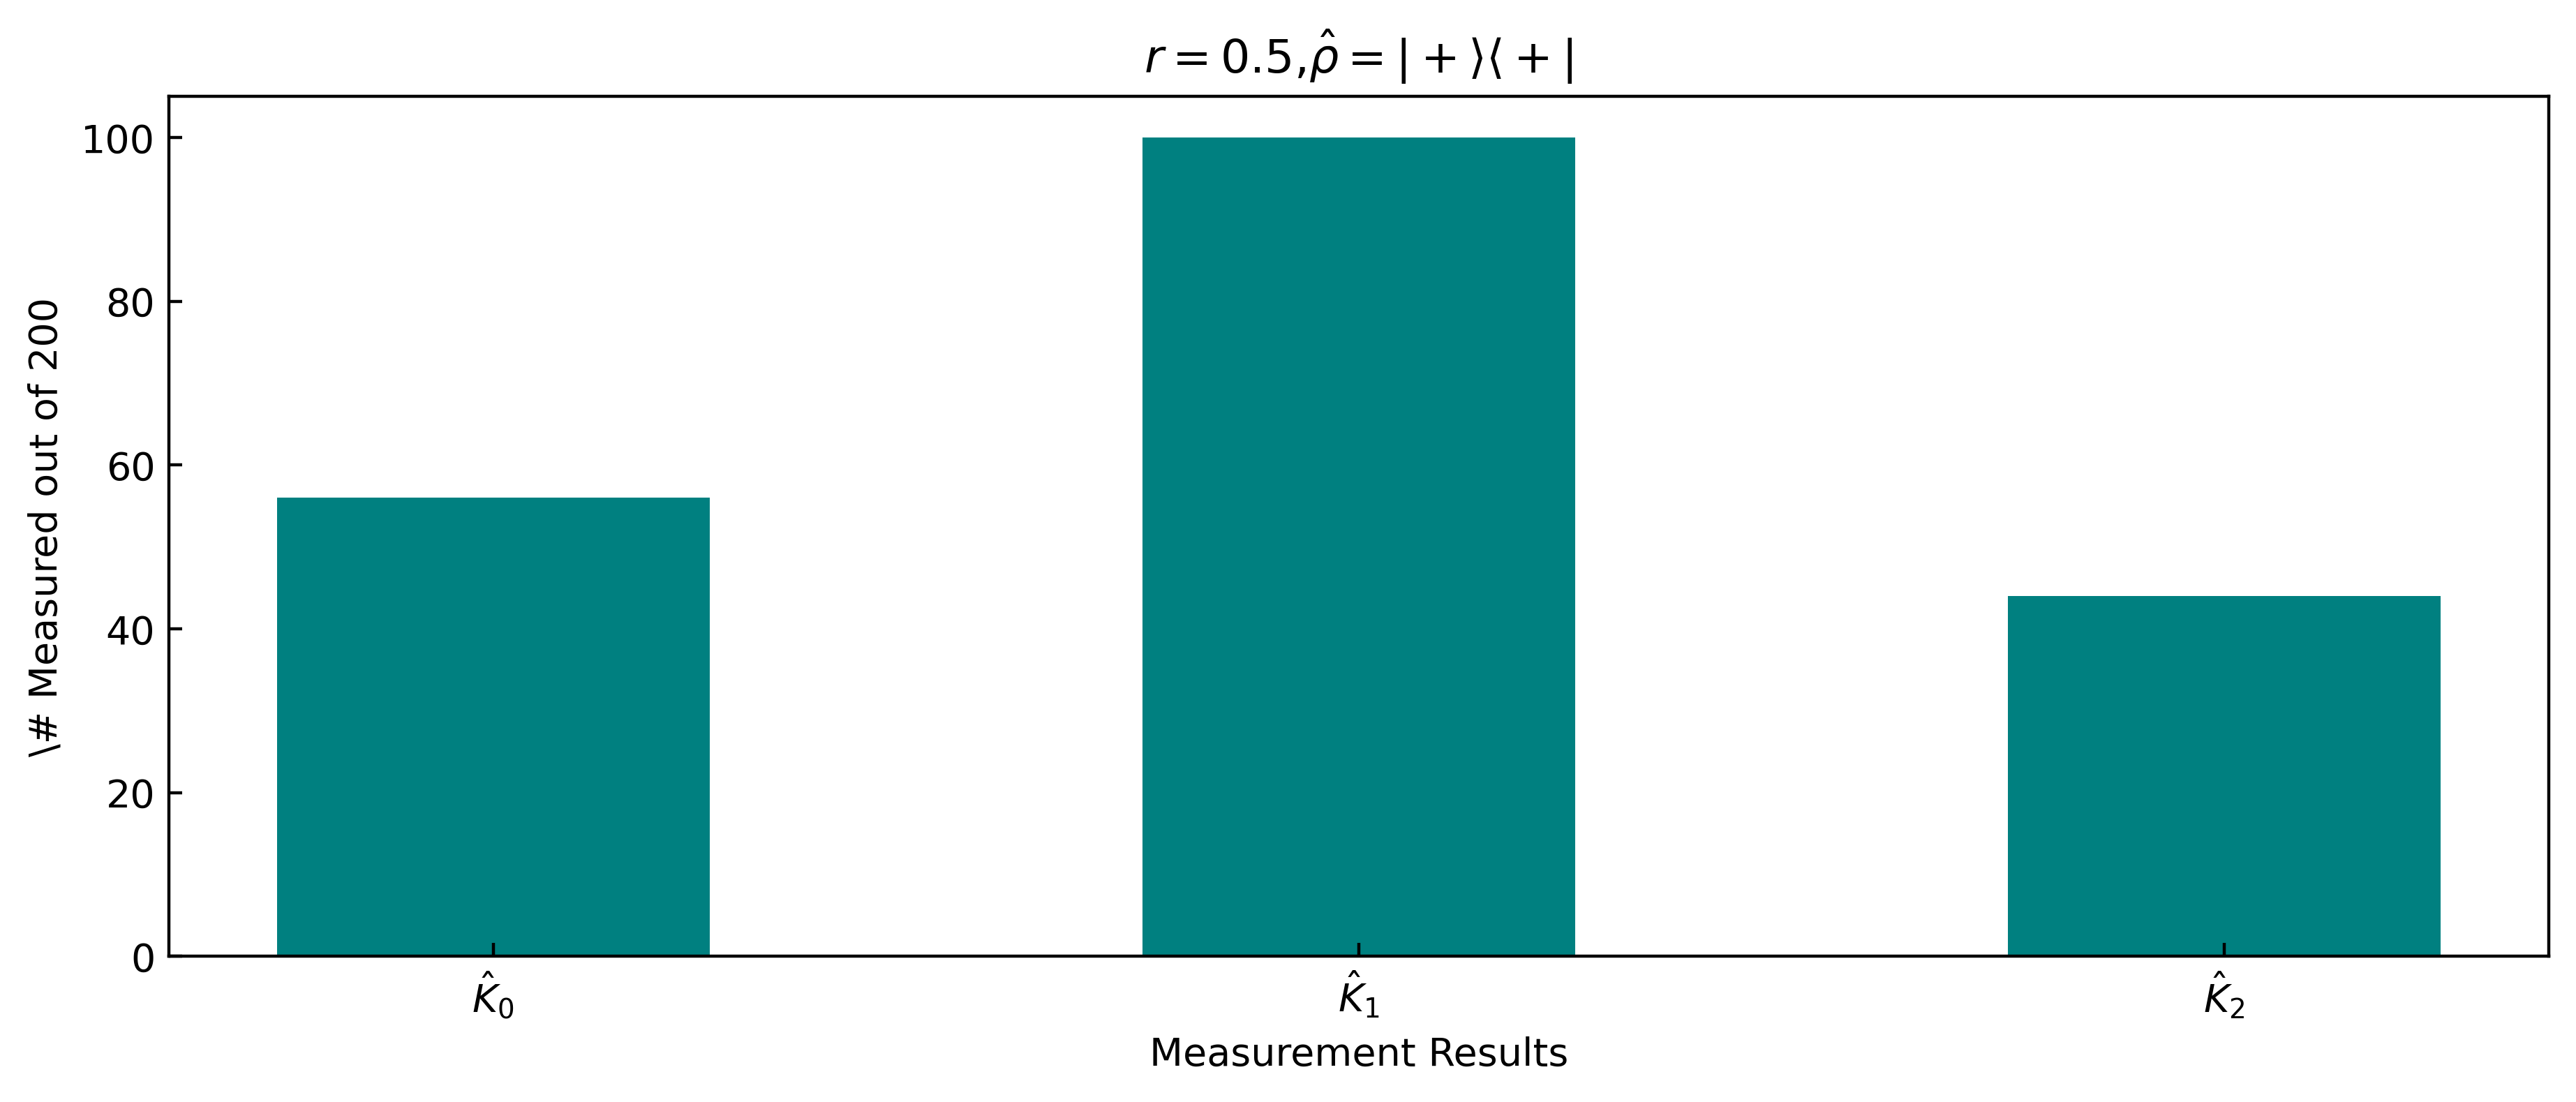

In [7]:
#defining the triple sided coin
def triple_coin(p0, p1):
    r = random()
    if r < p0:
        return 0
    elif r < p0 + p1:
        return 1
    else:
        return 2
#defining new kraus operators
def kraus7d(r):
    K0 = np.sqrt(1-r)*(raising @ lowering)
    K1 = lowering @ raising
    K2 = np.sqrt(r) * lowering
    return K0, K1, K2

rho = plus @ plus.T
r = 0.5
K0, K1, K2 = kraus7d(r)
p0 = np.trace(K0 @ rho @ K0.T.conjugate()).real
p1 = np.trace(K1 @ rho @ K1.T.conjugate()).real
p2 = np.trace(K2 @ rho @ K2.T.conjugate()).real

p_total = p0 + p1 + p2

print('P(0)=',round(p0, 3),'\n','P(1)=', round(p1, 3),'\n','P(2)=', round(p2, 3))
#2 possible outcomes, 0 and 1, with probabilities p0 and p1
measurements_size = 200
outcomes = [triple_coin(p0, p1) for i in range(measurements_size)]
plt.figure(figsize=(11,4),dpi=400)
plt.tick_params(axis="both", direction="in")
plt.hist(outcomes,[-.25,.25,.75,1.25,1.75,2.25], color='teal')
plt.xticks([0,1,2],[r'$\hat{K}_0$', r'$\hat{K}_1$',r'$\hat{K}_2$'])
plt.xlabel(r'Measurement Results')
plt.ylabel(r'\# Measured out of '+str(measurements_size))
plt.title(r'$r=0.5$,$\hat{\rho}=|+\rangle\langle+|$')
plt.show()